<a href="https://colab.research.google.com/github/mitleshpandit7/ML-PROJECT/blob/main/Loan_Default_Risk_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import all the library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Problem statement-Loan prediction

Step 1: Data Gathering

In [2]:
df =pd.read_csv("/content/loan_approvel.csv")

step 2:Data Quality Check


In [3]:
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Gender                   601 non-null    object 
 2   Married                  611 non-null    object 
 3   Dependents               599 non-null    object 
 4   Education                614 non-null    object 
 5   Self_Employed            582 non-null    object 
 6   ApplicantIncome          614 non-null    int64  
 7   CoapplicantIncome        614 non-null    float64
 8   LoanAmount               592 non-null    float64
 9   Loan_Amount_Term         600 non-null    float64
 10  Credit_History           564 non-null    float64
 11  Property_Area            614 non-null    object 
 12  Loan_Status              614 non-null    object 
 13  Age                      614 non-null    int64  
 14  Previous_Defaults        6

In [5]:
#check information for every column,Specifically here we are checking information for all the numerical columns
df.describe()



,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Age,Previous_Defaults,Collateral_Value,Credit_Score,Repayment_History_Score
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,43.019544,0.285016,269.669416,688.009772,0.683143
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,12.645613,0.546563,167.776462,136.294542,0.249181
min,150.000000,0.000000,9.000000,12.00000,0.000000,21.000000,0.000000,20.916828,304.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,32.000000,0.000000,177.557679,654.000000,0.610000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,44.000000,0.000000,230.631778,723.500000,0.740000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,54.000000,0.000000,310.349600,791.750000,0.870000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,64.000000,2.000000,1720.435250,849.000000,1.000000


In [6]:
df.isna().sum()*100/len(df)

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


Data Preprocessing & Feature Engineering:

In [7]:
#check again the mode value for this categorical column would be the most occurring value which is yes in this case.

step 3: Missing value imputation

1.Gender

<Axes: xlabel='Gender', ylabel='count'>

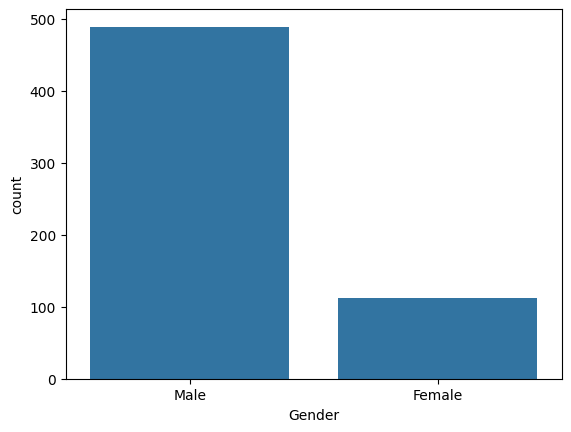

In [8]:
sns.countplot(x=df['Gender'])

In [9]:
df['Gender'].mode()[0]

'Male'

In [10]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

2.Married

<Axes: xlabel='Married', ylabel='count'>

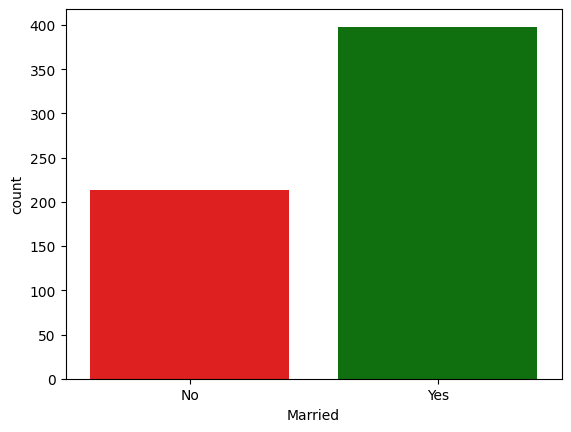

In [12]:
sns.countplot(x=df['Married'],palette={'Yes':'green','No':'red'})

In [13]:
df['Married'].mode()[0]

'Yes'

In [14]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

3.Dependents

<Axes: xlabel='Dependents', ylabel='count'>

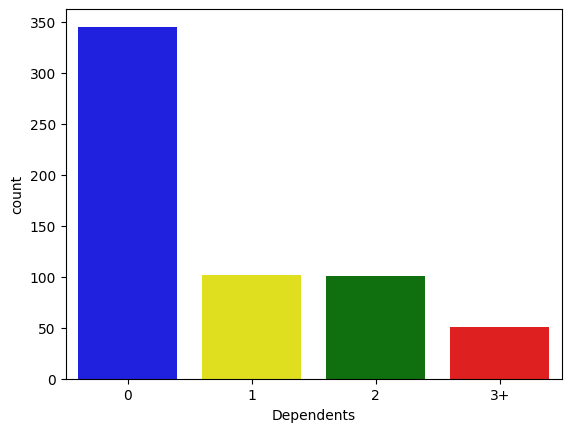

In [15]:
sns.countplot(x=df['Dependents'],palette={'0':'blue', '1':'yellow','2':'green','3+':'red'})

In [16]:
df['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [17]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

4.Self_Employed

<Axes: xlabel='Self_Employed', ylabel='count'>

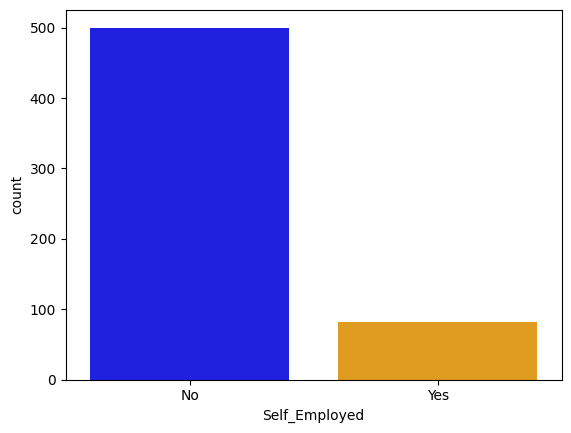

In [19]:
sns.countplot(x=df['Self_Employed'],palette={'Yes':'orange','No':'blue'})

In [20]:
df['Self_Employed'].mode()[0]

'No'

In [21]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [22]:
#again check the missing value
df.isna().sum()*100/len(df)

,0
Loan_ID,0.000000
Gender,0.000000
Married,0.000000
Dependents,0.000000
Education,0.000000
Self_Employed,0.000000
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


5.Credit_History

<Axes: xlabel='Credit_History', ylabel='count'>

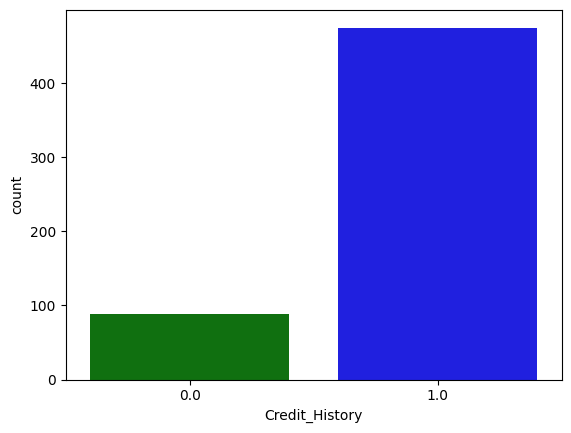

In [23]:
sns.countplot(x=df['Credit_History'],palette={'0.0':'green','1.0':'blue'})

In [24]:
df['Credit_History'].mode()[0]

np.float64(1.0)

In [25]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

So these two coluns are numerical columns.we are going to do imputation for them using median value  

6.LoanAmount

In [26]:
df['LoanAmount'].median()

128.0

In [27]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

7.Loan_Amount_Term

In [28]:
df['Loan_Amount_Term'].median()

360.0

In [ ]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [29]:
df.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,14


Step 3:-Categorical Encoding

Converted categorical variables into numeric values:

In [30]:
df.replace({
    "Loan_Status":{'N':0,'Y':1},
    'Gender':{'Male':1,'Female':0},
    'Married':{'Yes':1,'No':0},
    'Education':{'Graduate':1,'Not Graduate':0},
    'Self_Employed':{'Yes':1,'No':0}

},inplace=True)

In [31]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Age,Previous_Defaults,Collateral_Value,Credit_Score,Repayment_History_Score
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1,59,0,174.306410,818,0.81
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0,49,0,312.747572,783,0.66
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1,35,0,147.667484,674,0.88
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1,63,0,184.401294,790,0.92
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1,28,0,277.081990,766,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1,61,0,141.168038,786,0.91
610,LP002979,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,Rural,1,59,1,55.238297,696,0.81
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1,21,0,599.038249,792,0.74
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,1,23,0,426.010708,825,0.75


Step 4: Feature Creation

These features improve model accuracy:

In [32]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Age,Previous_Defaults,Collateral_Value,Credit_Score,Repayment_History_Score
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1,59,0,174.306410,818,0.81
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0,49,0,312.747572,783,0.66
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1,35,0,147.667484,674,0.88
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1,63,0,184.401294,790,0.92
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1,28,0,277.081990,766,0.73


1. Debt-to-Income Ratio

In [33]:
df['DTI'] = df['LoanAmount'] / (df['ApplicantIncome'] + df['CoapplicantIncome'])


✅Measures repayment burden on income.

2. Total Obligation Ratio

In [34]:
df['Total_Obligation_Ratio'] = df['LoanAmount'] / df['ApplicantIncome']


✅Indicates financial stress level.

3. Age Group Categories (If Age Available)

In [35]:
df['Age_Group'] = pd.cut(df['Age'],
                          bins=[18,30,45,60,100],
                          labels=['Young','Middle','Senior','Old'])

Step 5:-Feature Scaling

In [36]:
y = df['Loan_Status']
X = df.drop(columns=['Loan_ID', 'Loan_Status'])

Step 6:-Outlier Removal

In [37]:
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['LoanAmount'] >= Q1 - 1.5*IQR) & (df['LoanAmount'] <= Q3 + 1.5*IQR)]


Exploratory Data Analysis (EDA)

Step 7:-Loan Default Patterns Analysis

1.Loan Default Pattern by Age Group

In [38]:
# Check default distribution by age group
age_default_summary = pd.crosstab(df['Age_Group'], df['Loan_Status'], normalize='index')
print(age_default_summary)

Loan_Status         0         1
Age_Group                      
Young        0.286822  0.713178
Middle       0.288770  0.711230
Senior       0.334906  0.665094
Old          0.311111  0.688889


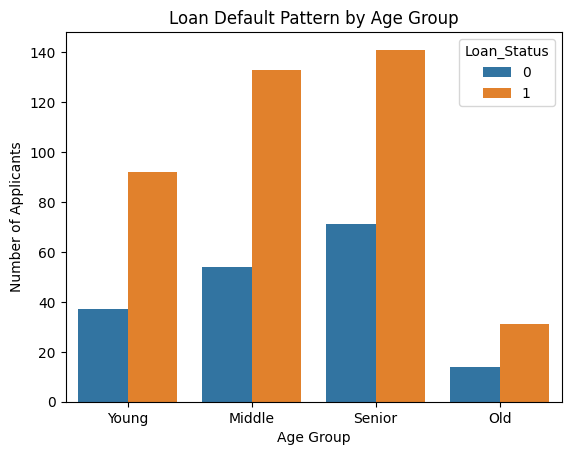

In [39]:
sns.countplot(x='Age_Group', hue='Loan_Status', data=df)
plt.title('Loan Default Pattern by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Applicants')
plt.show()

2. Loan Default Pattern by Income

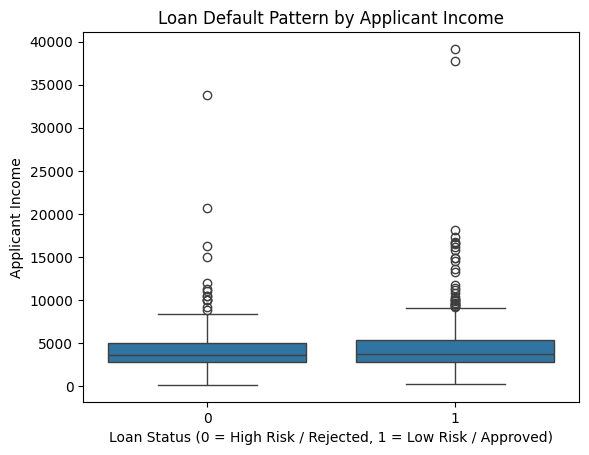

In [40]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Loan Default Pattern by Applicant Income')
plt.xlabel('Loan Status (0 = High Risk / Rejected, 1 = Low Risk / Approved)')
plt.ylabel('Applicant Income')
plt.show()


3. Loan Default Pattern by Employment Status

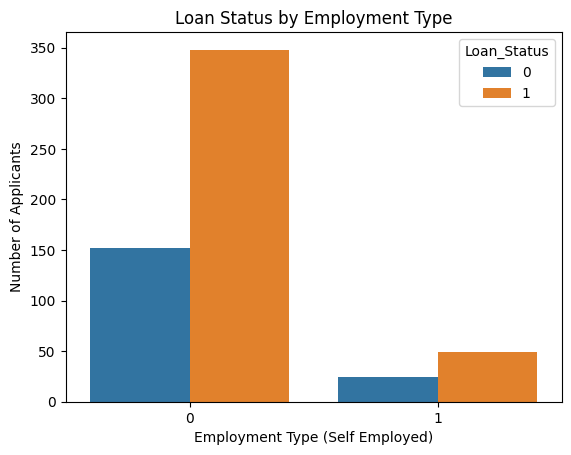

In [41]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)
plt.title('Loan Status by Employment Type')
plt.xlabel('Employment Type (Self Employed)')
plt.ylabel('Number of Applicants')
plt.show()


4. Loan Default Pattern by Credit Score (Credit History)

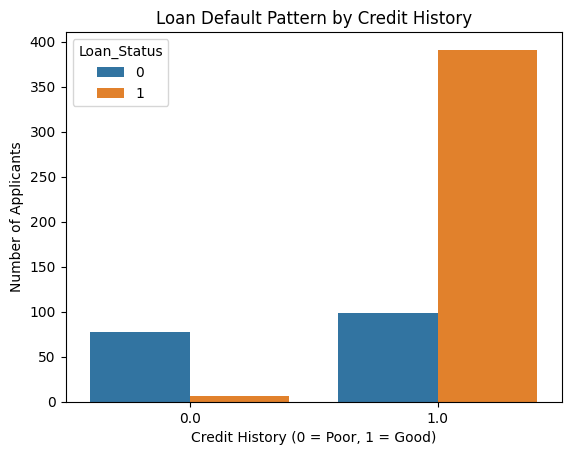

In [42]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title('Loan Default Pattern by Credit History')
plt.xlabel('Credit History (0 = Poor, 1 = Good)')
plt.ylabel('Number of Applicants')
plt.show()


Step 8:-Correlation Heatmap

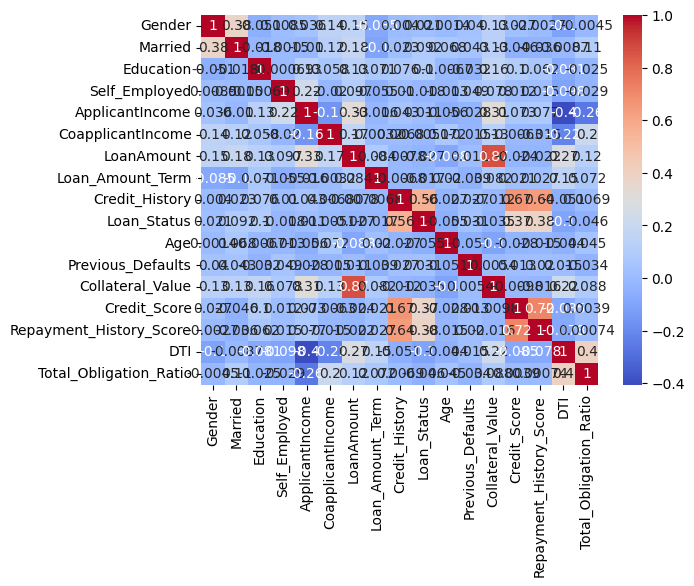

In [43]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

Step 9:-
     1.Boxplots to Analyze Numeric Features

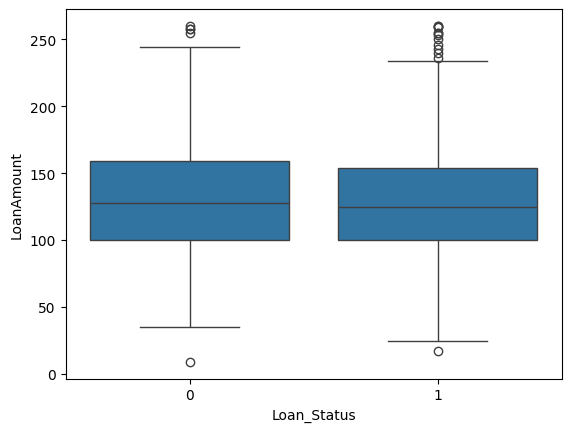

In [44]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.show()


2.distribution plots to analyze numeric features.

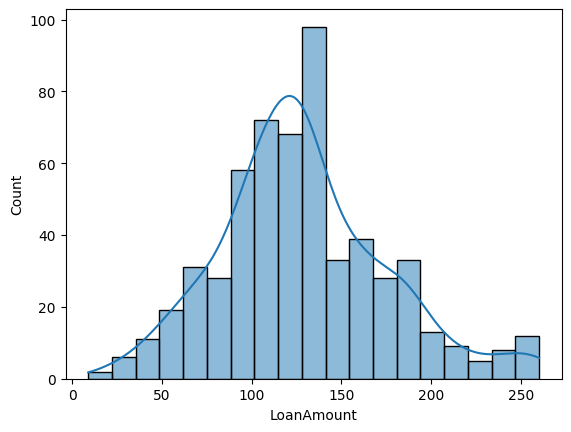

In [45]:
sns.histplot(df['LoanAmount'], kde=True)
plt.show()


Step 10:-Bar Charts to Understand Class Imbalance

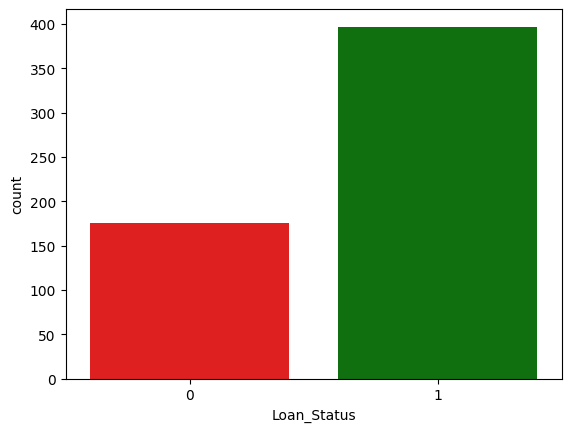

In [46]:
sns.countplot(x='Loan_Status', data=df, palette=['red', 'green'])
plt.show()



Step 11:- Train Test Split the data

In [47]:

def train_test_split_and_feature(df):

    # target
    y = df['Loan_Status']

    # drop target + id
    X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)

    # one-hot encoding (ONLY here)
    X = pd.get_dummies(
        X,
        columns=["Property_Area", "Dependents", "Age_Group"],
        drop_first=False   # IMPORTANT
    )

    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42
    )

    # SAVE EXACT FEATURE NAMES
    model_columns = list(X.columns)

    print("TRAINING SHAPE:", X.shape)
    print("FEATURE COUNT:", len(model_columns))
    print("FEATURE NAMES:", model_columns)

    return X_train, X_test, y_train, y_test, model_columns


In [50]:
X_train,X_test,y_train,y_test,features=train_test_split_and_feature(df)

TRAINING SHAPE: (573, 27)
FEATURE COUNT: 27
FEATURE NAMES: ['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Age', 'Previous_Defaults', 'Collateral_Value', 'Credit_Score', 'Repayment_History_Score', 'DTI', 'Total_Obligation_Ratio', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Age_Group_Young', 'Age_Group_Middle', 'Age_Group_Senior', 'Age_Group_Old']


In [66]:
import joblib

joblib.dump(best_xgb, "loan_risk_model.pkl")
joblib.dump(features, "model_columns.pkl")   # features = list(X.columns)
from google.colab import files
files.download("model_columns.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step 12:-Models Implemented

✅1. Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import numpy as np

# Create a SimpleImputer to fill missing values, using the median strategy
imputer = SimpleImputer(strategy='median')

# Identify columns with NaNs in X_train (if any remain)
cols_with_nan = X_train.columns[X_train.isnull().any()].tolist()

# Create copies to avoid modifying the original X_train and X_test directly for other models
X_train_imputed = X_train.copy()
X_test_imputed = X_test.copy()

if cols_with_nan:
    # Fit the imputer on the training data and transform both training and test data
    X_train_imputed[cols_with_nan] = imputer.fit_transform(X_train_imputed[cols_with_nan])
    X_test_imputed[cols_with_nan] = imputer.transform(X_test_imputed[cols_with_nan])

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_imputed, y_train)

lr_pred = lr.predict(X_test_imputed)


✅2. Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)


✅3. Gradient Boosting Classifier

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_imputed, y_train)

gb_pred = gb.predict(X_test_imputed)


✅4. XGBoost

In [72]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42,
    eval_metric='logloss'
)
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)


✅5. Support Vector Machine


In [74]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train_imputed, y_train)

svm_pred = svm.predict(X_test_imputed)


 Step 13:-Model Optimization:

  ✅1. Hyperparameter Tuning Using GridSearchCV or RandomizedSearchCV

▶ Logistic Regression - GridSearchCV

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid_lr,
    cv=5,
    scoring='accuracy'
)

grid_lr.fit(X_train_imputed, y_train)

best_lr = grid_lr.best_estimator_
print("Best Logistic Params:", grid_lr.best_params_)

Best Logistic Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


▶ Random Forest Classifier - GridSearchCV

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

grid_rf = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print("Best RF Parameters:", grid_rf.best_params_)


Best RF Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


▶ Gradient Boosting Classifier - RandomizedSearchCV

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingClassifier(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4]
}

random_gb = RandomizedSearchCV(
    gb,
    param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)

random_gb.fit(X_train_imputed, y_train)

best_gb = random_gb.best_estimator_
print("Best GB Parameters:", random_gb.best_params_)


Best GB Parameters: {'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.01}


▶ XGBoost - GridSearchCV

In [81]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.5]
}

grid_xgb = GridSearchCV(
    xgb,
    param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
print("Best XGB Parameters:", grid_xgb.best_params_)


Best XGB Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1.5}


▶ Support Vector Machine - GridSearchCV

In [83]:
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf'],
    'gamma': ['scale', 0.1, 0.01]
}

grid_svm = GridSearchCV(
    SVC(probability=True),
    param_grid_svm,
    cv=3,
    scoring='accuracy'
)

grid_svm.fit(X_train_imputed, y_train)

best_svm = grid_svm.best_estimator_
print("Best SVM Params:", grid_svm.best_params_)

Best SVM Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}


Step 14:-Model Performance After Optimization

In [85]:
from sklearn.metrics import accuracy_score

models = {
    "Optimized Logistic Regression": best_lr,
    "Optimized Random Forest": best_rf,
    "Optimized Gradient Boosting": best_gb,
    "Optimized XGBoost": best_xgb,
    "Optimized SVM": best_svm
}

for name, model in models.items():
    if name in ["Optimized Logistic Regression", "Optimized Gradient Boosting", "Optimized SVM"]:
        y_pred = model.predict(X_test_imputed)
    else:
        y_pred = model.predict(X_test)
    print(name, "Accuracy:", accuracy_score(y_test, y_pred))


Optimized Logistic Regression Accuracy: 0.8260869565217391
Optimized Random Forest Accuracy: 0.8260869565217391
Optimized Gradient Boosting Accuracy: 0.8434782608695652
Optimized XGBoost Accuracy: 0.8347826086956521
Optimized SVM Accuracy: 0.6956521739130435


Step 15:-Handling Imbalanced Data

✅ Check Class Distribution

In [86]:
df['Loan_Status'].value_counts(normalize=True) * 100


,proportion
Loan_Status,
1,69.284468
0,30.715532


Technique-1: SMOTE (Oversampling Minority Class)

In [88]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_sm, y_sm = smote.fit_resample(X_train_imputed, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_sm.value_counts())


Before SMOTE: Loan_Status
1    317
0    141
Name: count, dtype: int64
After SMOTE: Loan_Status
1    317
0    317
Name: count, dtype: int64


Technique-2: Class Weights (Model-Level Solution)

Logistic Regression Example

In [95]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    class_weight='balanced',
    max_iter=1000
)
lr.fit(X_train_imputed, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

Random Forest Example

In [90]:
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

Technique-3: Undersampling Majority Class

In [92]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_under, y_under = rus.fit_resample(X_train, y_train)

print(y_under.value_counts())


Loan_Status
0    141
1    141
Name: count, dtype: int64


Technique-4: Threshold Tuning (Improve Sensitivity)

In [93]:
y_prob = best_xgb.predict_proba(X_test)[:,1]

y_pred_custom = (y_prob >= 0.35).astype(int)


In [94]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       0.95      0.51      0.67        35
           1       0.82      0.99      0.90        80

    accuracy                           0.84       115
   macro avg       0.89      0.75      0.78       115
weighted avg       0.86      0.84      0.83       115



Step :-Model Evaluation

1️⃣ Accuracy

In [96]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.6956521739130435

2️⃣ Precision

In [97]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)


0.6956521739130435

3️⃣ Recall (identify risky customers correctly)

In [98]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)


1.0

4️⃣ F1 Score

In [99]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)


0.8205128205128205

6️⃣ ROC–AUC Curve

In [101]:
from sklearn.metrics import roc_auc_score, roc_curve

y_prob = model.predict_proba(X_test_imputed)[:,1]

roc_auc_score(y_test, y_prob)


np.float64(0.2460714285714286)

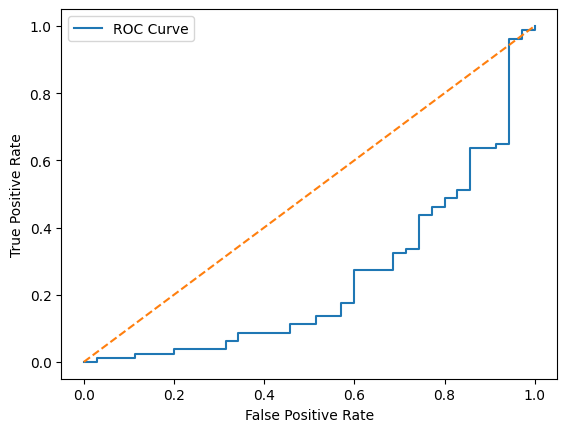

In [102]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


5️⃣ Confusion Matrix

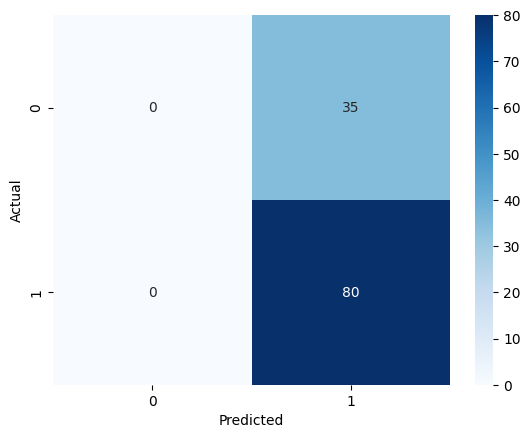

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from google.colab import files
files.download("loan_risk_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>